In [24]:
import pandas as pd
import peewee
import matplotlib.pyplot as plt
import seaborn as sns

#### Connect to data source

In [25]:
db = peewee.SqliteDatabase("../data/dataset.sqlite3")
conn = db.connection()

In [26]:
tables = db.get_tables()
print(tables)

['stockcandledata']


#### Dataframe Loading 

In [27]:
df = pd.read_sql(f"SELECT * FROM {tables[0]} WHERE symbol = 'AAPL'", conn)
df["timestamp"] = pd.to_datetime(df["timestamp"])

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 337883 entries, 0 to 337882
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype              
---  ------       --------------   -----              
 0   symbol       337883 non-null  object             
 1   timestamp    337883 non-null  datetime64[ns, UTC]
 2   open_price   337883 non-null  float64            
 3   high_price   337883 non-null  float64            
 4   low_price    337883 non-null  float64            
 5   close_price  337883 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(4), object(1)
memory usage: 15.5+ MB


In [29]:
df.head()

,symbol,timestamp,open_price,high_price,low_price,close_price
0,AAPL,2016-01-01 00:00:00+00:00,105.43,105.43,105.40,105.4000
1,AAPL,2016-01-01 00:10:00+00:00,105.40,105.41,105.40,105.4100
2,AAPL,2016-01-01 00:15:00+00:00,105.41,105.41,105.40,105.4000
3,AAPL,2016-01-01 00:35:00+00:00,105.41,105.47,105.40,105.4700
4,AAPL,2016-01-01 00:45:00+00:00,105.48,105.51,105.48,105.5099


Null Values

In [30]:
df.isnull().sum()

symbol         0
timestamp      0
open_price     0
high_price     0
low_price      0
close_price    0
dtype: int64

#### Time Series Analysis

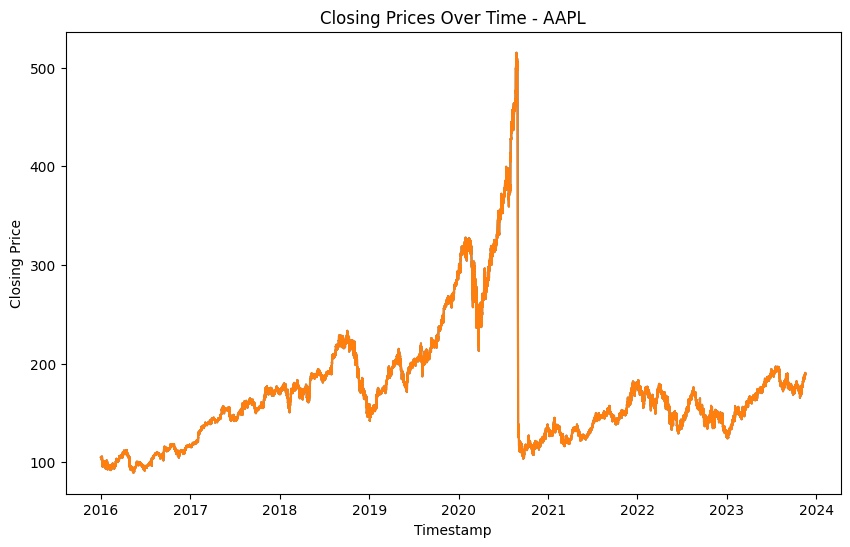

In [31]:
x_axis = df.loc[:, "timestamp"]
y_axis = df.loc[:, "close_price"]

plt.figure(figsize=(10, 6))
plt.plot(x_axis, y_axis)
sns.lineplot(x="timestamp", y="close_price", data=df)

plt.title("Closing Prices Over Time - AAPL")
plt.xlabel('Timestamp')
plt.ylabel('Closing Price')
plt.show()

#### Box Plot

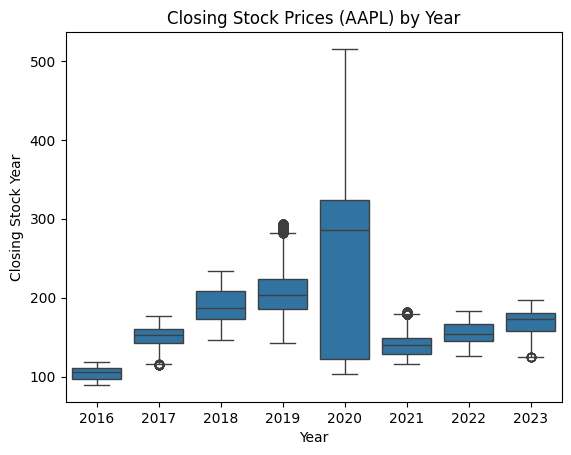

In [32]:
df["year"] = df["timestamp"].dt.year
sns.boxplot(x="year", y="close_price", data=df)
plt.title("Closing Stock Prices (AAPL) by Year")
plt.xlabel("Year")
plt.ylabel("Closing Stock Year")
plt.show()

#### Heatmap of stock prices

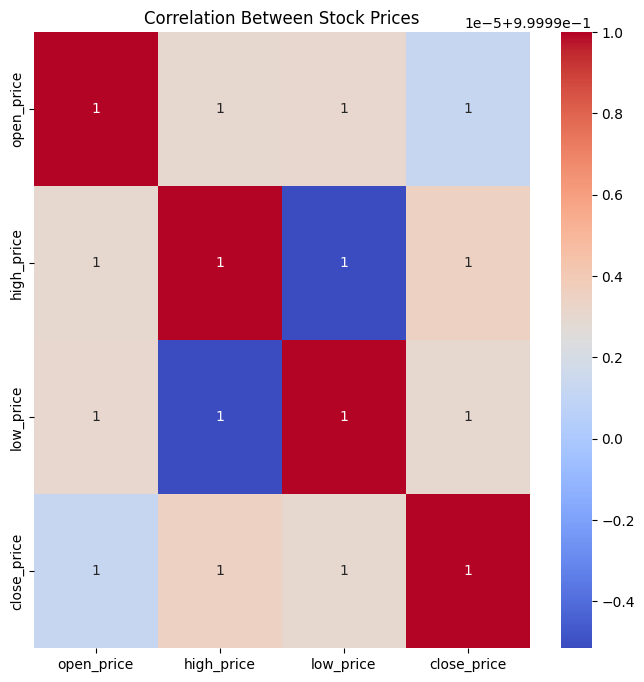

In [34]:
corr = df.loc[:, ["open_price", "high_price", "low_price", "close_price"]].corr()
plt.figure(figsize=(8, 8))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Between Stock Prices")
plt.show()

#### Distribution Of Stock Price

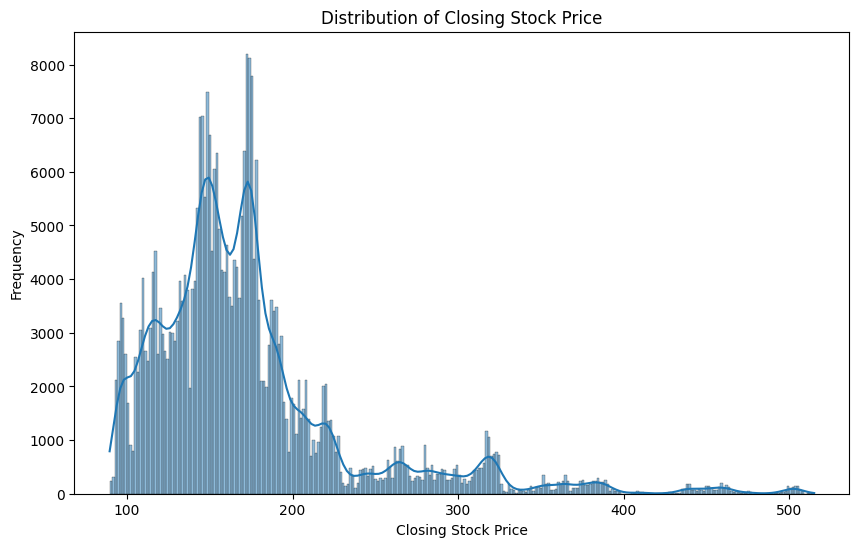

In [35]:
plt.figure(figsize=(10, 6))
sns.histplot(df["close_price"], kde=True)
plt.title("Distribution of Closing Stock Price")
plt.xlabel('Closing Stock Price')
plt.ylabel('Frequency')
plt.show()

#### Daily Returns

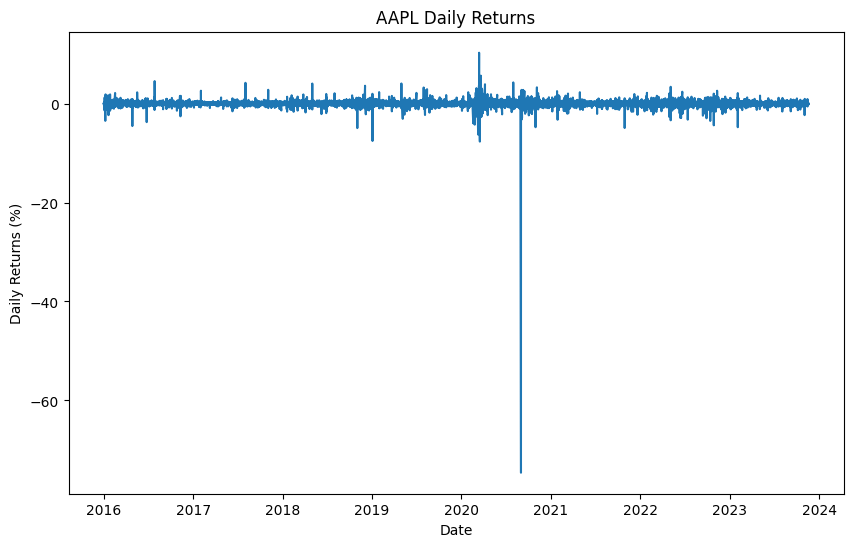

In [41]:
df["daily_returns"] = df['close_price'].pct_change() * 100

plt.figure(figsize=(10, 6))
plt.plot(df["timestamp"], df["daily_returns"])
plt.title('AAPL Daily Returns')
plt.xlabel('Date')
plt.ylabel('Daily Returns (%)')
plt.show()